## Python'da Türkiye Haritası Çizmek

#### Ozancan Ozdemir (ozancan@metu.edu.tr)

Merhabalar! 

Bugüne kadar hep R Programlama dili ile ilgili içerik hazırlayan biri olarak ilk Python içeriğimi hazırladığım için oldukça heyecanlıyım. İlk içerik olacağı için tıpkı R'da da yapmış olduğum gibi Python için de Türkiye haritası çizdirme içeriği hazırlamak istedim. 

**Ufak bir hatırlatma!**

[R'da Türkiye haritası çizdirmek için bu öğreticiyi inceleyebilirsiniz.](http://users.metu.edu.tr/ozancan/harita.html)


Haritalar, veri görselleştirme araçları içerisinde oldukça faydalı bir araç durumuna geldi zaman içerisinde. Haritalarında kendi içinde çeşitli türleri mevcut, ancak bu türler içinde en çok kullanılanı ve **hikayeyi** en güzel anlatanı **koroplet** harita. 

![Koroplet Harita Örneği(https://datavizcatalogue.com/)](https://datavizcatalogue.com/TR/yontemleri/images/top_images/PNG/koroplet_harita.png)

Koroplet Harita Örneği(https://datavizcatalogue.com/)


Başka bir öğreticide belki Avrupa ve Dünya haritası çizmeyi konuşabiliriz ki bu konuda internette oldukça güzel içerikler bulmak mümkün. 

Bu öğreticide ben **geopandas** kütüphanesinden faydalanacağım. Geopandas konumsal veri manipülasyonu ve haritalamada oldukça faydalı ve işleri kolaylaştırıcı bir paket olsa da yüklemesi bilindik paketlere göre biraz daha zor. Bu kütüphaneyi yüklemek için [şu adresteki](https://towardsdatascience.com/geopandas-installation-the-easy-way-for-windows-31a666b3610f) blog yazısını takip edebilirsiniz. 

Haritamızı çizdirmek için **geojson** formatında coğrafi ve mekansal bilgilerin kayıtlı olduğu bir dosya türü kullanacağız. İşi veri görselleştirmeye temas eden her bir meslek grubunun mutlaka bilmesi gereken bir dosya formatı olduğunu da eklemem gerek burada. 

**GeoJSON nedir?**

GeoJSON, JavaScript Object Notation (JSON) tabanlı bir jeo-uzamsal veri değişim formatıdır. Çeşitli JSON nesnesi türlerini ve coğrafi özellikler, özellikleri ve uzamsal kapsamları hakkındaki verileri temsil etmek için bir araya getirilme biçimini tanımlar. GeoJSON bir coğrafi koordinat referans sistemi olan World Geodetic System 1984 ve ondalık derece birimleri kullanır.

[RFC 7946 – The GeoJSON Format (ietf.org)](https://tools.ietf.org/pdf/rfc7946.pdf)
[GeoJSON Dosyası Nedir? Nasıl Kullanılır?](https://www.cakirefekan.com/2021/01/geojson-dosyasi-nedir-nasil-kullanilir/)

Bu çalışmada kullanmış olduğum GeoJSON dosyasını [GitHub](https://github.com/ozancanozdemir) hesabımda bulabilirsiniz. 

In [176]:
import geopandas as gp
ulke = gp.read_file("countries.geojson")

In [177]:
import pandas as pd
ulke.head(10) #ilk 10 satır 

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."
5,Aland,ALA,"MULTIPOLYGON (((20.92018 59.90925, 20.91236 59..."
6,Andorra,AND,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ..."
7,United Arab Emirates,ARE,"MULTIPOLYGON (((53.86305 24.23469, 53.88860 24..."
8,Argentina,ARG,"MULTIPOLYGON (((-68.65412 -54.88624, -68.65414..."
9,Armenia,ARM,"MULTIPOLYGON (((45.54717 40.62155, 45.51369 40..."


In [178]:
ulke.shape

(255, 3)

Görüldüğü gibi okuttuğumuz verimiz 255 satır ve 3 sütundan oluşuyor. Bu sütunlar ülke adı, ülke kodu ve enlem&boylam değerlerinden oluşurken her bir satır farklı bir ülkeyi temsil ediyor. Şimdi gelin, burada Türkiye'nin bilgilerini data frame objesine uygulanan basit bir veri kümeleme işlemi uygulayarak elde edelim.

In [179]:
turkiye = ulke[ulke['ADMIN'] == 'Turkey']
turkiye

,ADMIN,ISO_A3,geometry
230,Turkey,TUR,"MULTIPOLYGON (((26.04005 39.84504, 26.04623 39..."


```.plot()``` komutu kullanarak elde ettiğimiz bu satırı görselleştirebilir ve illere bölünmemiş bir Türkiye haritası elde edebiliriz. 

<AxesSubplot:>

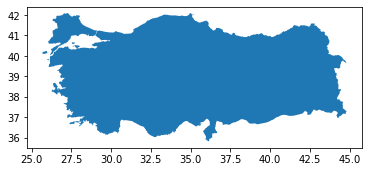

In [180]:
turkiye.plot() 

**Peki İller?**

Yukarıda çizdirmiş olduğumuz haritayı illere bölmek için, Türkiye'deki illerin ve onların konumsal bilgilerini içeren bir dosyaya ihtiyacımız olacak elbette. Yine ilgili dosyayı [GitHub](https://github.com/ozancanozdemir) hesabımda bulabilirsiniz.

İlleri çizdirmek istediğim için adm1 uzantılı dosyayı okuttum. İlçeleri çizdirmek isterseniz eğer ```TUR_adm2``` isimli dosyayı okutabilirsiniz. 

In [181]:
turkiye_iller = gp.read_file('TUR_adm1.shp')
turkiye_iller.head(10)

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,235,TUR,Turkey,1,Çanakkale,Il,Province,None,None,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39..."
1,235,TUR,Turkey,2,Çankiri,Il,Province,None,Çankırı|Changra,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,235,TUR,Turkey,3,Çorum,Il,Province,None,None,"POLYGON ((34.81906 41.20172, 34.84486 41.19581..."
3,235,TUR,Turkey,4,Adana,Il,Province,None,Seyhan,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36..."
4,235,TUR,Turkey,5,Adiyaman,Il,Province,None,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."
5,235,TUR,Turkey,6,Afyon,Il,Province,None,Afyonkarahisar,"POLYGON ((31.36277 39.16468, 31.36626 39.15131..."
6,235,TUR,Turkey,7,Agri,Il,Province,None,Ağri|Karaköse,"POLYGON ((43.39566 39.92580, 43.39598 39.91575..."
7,235,TUR,Turkey,8,Aksaray,Il,Province,None,None,"POLYGON ((34.20521 38.84115, 34.21472 38.82775..."
8,235,TUR,Turkey,9,Amasya,Il,Province,None,None,"POLYGON ((35.70255 40.87732, 35.71431 40.87629..."
9,235,TUR,Turkey,10,Ankara,Il,Province,None,Ancara|Angora,"POLYGON ((33.18796 40.41365, 33.19410 40.40469..."


Yine ```.plot()``` fonksiyonu kullanarak il grafiğimizi çizdirelim.

<AxesSubplot:>

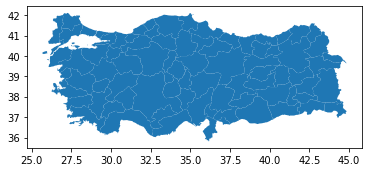

In [182]:
turkiye_iller.plot()

Şimdi isterseniz görseli daha da büyütüp, siyah beyaz bir hale getirelim.

<AxesSubplot:>

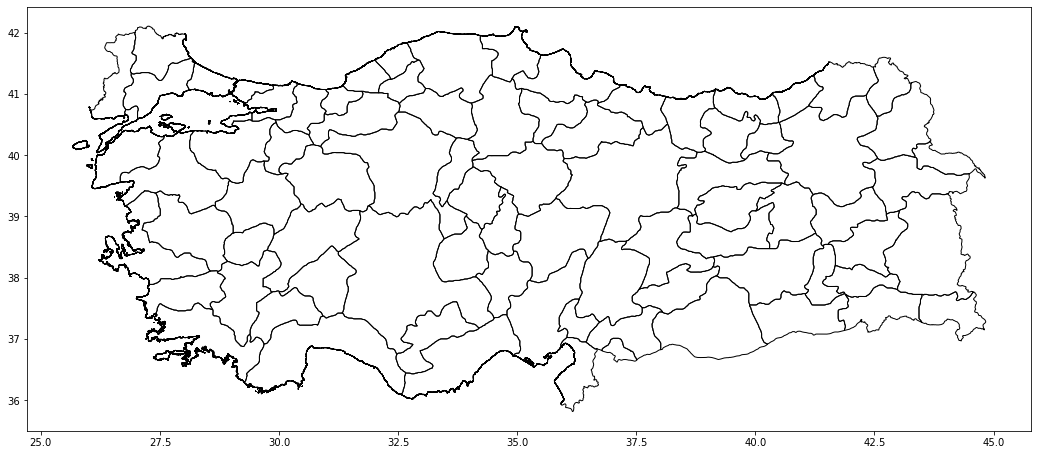

In [183]:
turkiye_iller.plot(figsize=(18,18),edgecolor ="k",facecolor="none")
#figsize görselin büyüklüğünü ayarlıyor 
#edgecolor ise il ve ülke sınırlarının çizgi rengini ayarlıyor (b=mavi, r=kırmızı)
#facecolor ise illerin içlerinin renklerini ayarlıyor 

Yukarıda açıkladığım argümanları değiştirirsek eğer örneğin;

<AxesSubplot:>

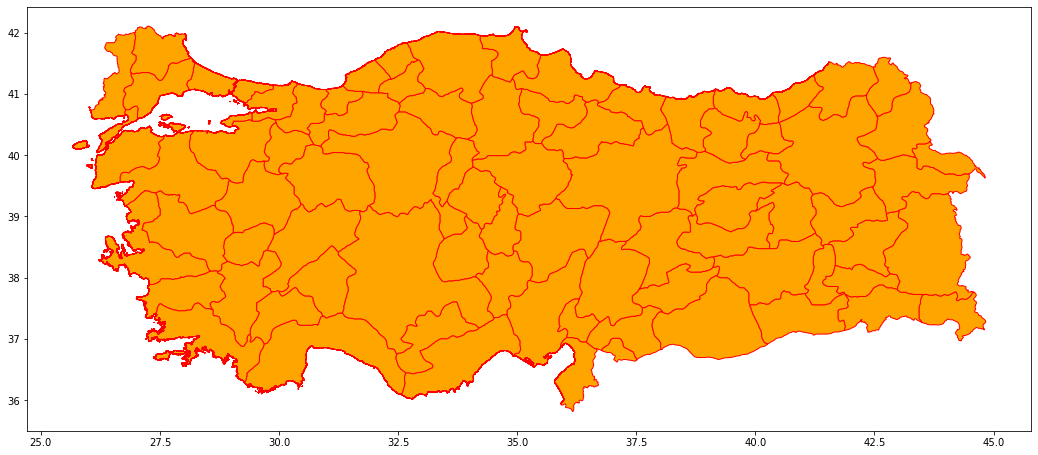

In [184]:
turkiye_iller.plot(figsize=(18,18),edgecolor ="red",facecolor="orange")

Haritamız hazır! 

Ancak işimiz elbette bununla sınırlı değil. Haritayı kullanmamızın arkasında bir hikaye var ve bu hikayeyi içeren bir de veri setimiz var. Ben bu öğreticide illere göre ortanca(medyan) yaş değerlerine göre bir renklendirme yapıp bunu görselleştirmek istiyorum. Bunun için TUIK ADNKS 2021 sonuçlarından ilgili veri setini kullanıyorum. Bu veri seti de GitHub hesabımda yer alıyor. 

In [185]:
import pandas as pd
yas = pd.read_csv('yas.csv', encoding='latin-1',sep=';')
yas

,Il,Yas
0,Adana,"32,1"
1,Adiyaman,"27,7"
2,Afyonkarahisar,"34,1"
3,Agri,"22,3"
4,Amasya,"38,1"
...,...,...
76,Yalova,"36,3"
77,Karabuk,"37,4"
78,Kilis,27
79,Osmaniye,"30,9"


Şimdi bu iki veri setini tek bir veri seti altında birleştireceğiz. Bunu da il değişkeni üzerinden yapacağız. O yüzden her iki veri setinde de il değişkenlerinin aynı olması lazım. Önce harita için kullandığımız veride yer alan il isimlerini gösterelim.

In [186]:
for i in turkiye_iller["NAME_1"].iteritems():
    print(i)

(0, 'Çanakkale')
(1, 'Çankiri')
(2, 'Çorum')
(3, 'Adana')
(4, 'Adiyaman')
(5, 'Afyon')
(6, 'Agri')
(7, 'Aksaray')
(8, 'Amasya')
(9, 'Ankara')
(10, 'Antalya')
(11, 'Ardahan')
(12, 'Artvin')
(13, 'Aydin')
(14, 'Balikesir')
(15, 'Bartın')
(16, 'Batman')
(17, 'Bayburt')
(18, 'Bilecik')
(19, 'Bingöl')
(20, 'Bitlis')
(21, 'Bolu')
(22, 'Burdur')
(23, 'Bursa')
(24, 'Düzce')
(25, 'Denizli')
(26, 'Diyarbakir')
(27, 'Edirne')
(28, 'Elazığ')
(29, 'Erzincan')
(30, 'Erzurum')
(31, 'Eskisehir')
(32, 'Gümüshane')
(33, 'Gaziantep')
(34, 'Giresun')
(35, 'Hakkari')
(36, 'Hatay')
(37, 'Iğdır')
(38, 'Isparta')
(39, 'Istanbul')
(40, 'Izmir')
(41, 'K. Maras')
(42, 'Kütahya')
(43, 'Karabük')
(44, 'Karaman')
(45, 'Kars')
(46, 'Kastamonu')
(47, 'Kayseri')
(48, 'Kilis')
(49, 'Kinkkale')
(50, 'Kirklareli')
(51, 'Kirsehir')
(52, 'Kocaeli')
(53, 'Konya')
(54, 'Malatya')
(55, 'Manisa')
(56, 'Mardin')
(57, 'Mersin')
(58, 'Mugla')
(59, 'Mus')
(60, 'Nevsehir')
(61, 'Nigde')
(62, 'Ordu')
(63, 'Osmaniye')
(64, 'Rize')
(6

In [187]:
for j in yas["Il"].iteritems():
    print(j)

(0, 'Adana')
(1, 'Adiyaman')
(2, 'Afyonkarahisar')
(3, 'Agri')
(4, 'Amasya')
(5, 'Ankara')
(6, 'Antalya')
(7, 'Artvin')
(8, 'Aydin')
(9, 'Balikesir')
(10, 'Bilecik')
(11, 'Bingol')
(12, 'Bitlis')
(13, 'Bolu')
(14, 'Burdur')
(15, 'Bursa')
(16, 'Çanakkale')
(17, 'Çankiri')
(18, 'Çorum')
(19, 'Denizli')
(20, 'Diyarbakir')
(21, 'Edirne')
(22, 'Elazig')
(23, 'Erzincan')
(24, 'Erzurum')
(25, 'Eskisehir')
(26, 'Gaziantep')
(27, 'Giresun')
(28, 'Gumushane')
(29, 'Hakkari')
(30, 'Hatay')
(31, 'Isparta')
(32, 'Mersin')
(33, 'Istanbul')
(34, 'Izmir')
(35, 'Kars')
(36, 'Kastamonu')
(37, 'Kayseri')
(38, 'Kirklareli')
(39, 'Kirsehir')
(40, 'Kocaeli')
(41, 'Konya')
(42, 'Kutahya')
(43, 'Malatya')
(44, 'Manisa')
(45, 'Kahramanmaras')
(46, 'Mardin')
(47, 'Mugla')
(48, 'Mus')
(49, 'Nevsehir')
(50, 'Nigde')
(51, 'Ordu')
(52, 'Rize')
(53, 'Sakarya')
(54, 'Samsun')
(55, 'Siirt')
(56, 'Sinop')
(57, 'Sivas')
(58, 'Tekirdag')
(59, 'Tokat')
(60, 'Trabzon')
(61, 'Tunceli')
(62, 'Sanliurfa')
(63, 'Usak')
(64, 'V

Görüldüğü gibi bazı il isimlerinde harf bazılarında da yazım açısından uyuşmazlık var. Harita verimizde ```replace()``` komutu yardımıyla uyuşmazlık olan illeri değiştirelim. 

In [188]:
turkiye_iller.replace("K. Maras","Kahramanmaras",inplace=True)
turkiye_iller.replace('Gümüshane', 'Gumushane',inplace=True)
turkiye_iller.replace('Kinkkale', 'Kirikkale',inplace=True)
turkiye_iller.replace('Zinguldak', 'Zonguldak',inplace=True)
turkiye_iller.replace('Afyon', 'Afyonkarahisar',inplace=True)
turkiye_iller.replace('Kütahya', 'Kutahya',inplace=True)
turkiye_iller.replace('Elazığ','Elazig',inplace = True)
turkiye_iller.replace('Bingöl','Bingol',inplace = True)
turkiye_iller.replace('Bartın','Bartin',inplace = True)
turkiye_iller.replace('Karabük','Karabuk',inplace=True)
turkiye_iller.replace('Düzce','Duzce',inplace = True)

In [189]:
for i in turkiye_iller["NAME_1"].iteritems():
    print(i)

(0, 'Çanakkale')
(1, 'Çankiri')
(2, 'Çorum')
(3, 'Adana')
(4, 'Adiyaman')
(5, 'Afyonkarahisar')
(6, 'Agri')
(7, 'Aksaray')
(8, 'Amasya')
(9, 'Ankara')
(10, 'Antalya')
(11, 'Ardahan')
(12, 'Artvin')
(13, 'Aydin')
(14, 'Balikesir')
(15, 'Bartin')
(16, 'Batman')
(17, 'Bayburt')
(18, 'Bilecik')
(19, 'Bingol')
(20, 'Bitlis')
(21, 'Bolu')
(22, 'Burdur')
(23, 'Bursa')
(24, 'Duzce')
(25, 'Denizli')
(26, 'Diyarbakir')
(27, 'Edirne')
(28, 'Elazig')
(29, 'Erzincan')
(30, 'Erzurum')
(31, 'Eskisehir')
(32, 'Gumushane')
(33, 'Gaziantep')
(34, 'Giresun')
(35, 'Hakkari')
(36, 'Hatay')
(37, 'Iğdır')
(38, 'Isparta')
(39, 'Istanbul')
(40, 'Izmir')
(41, 'Kahramanmaras')
(42, 'Kutahya')
(43, 'Karabuk')
(44, 'Karaman')
(45, 'Kars')
(46, 'Kastamonu')
(47, 'Kayseri')
(48, 'Kilis')
(49, 'Kirikkale')
(50, 'Kirklareli')
(51, 'Kirsehir')
(52, 'Kocaeli')
(53, 'Konya')
(54, 'Malatya')
(55, 'Manisa')
(56, 'Mardin')
(57, 'Mersin')
(58, 'Mugla')
(59, 'Mus')
(60, 'Nevsehir')
(61, 'Nigde')
(62, 'Ordu')
(63, 'Osmaniye')


Bu problemi hallettik, ancak işimiz bitmedi... İki veri setini birleştirmek için iki veri setinde de ortak isimli bir değişken olmak zorunda. Ancak bizim harita verimizde iller ```NAME_1```, yaş verimizde ise ```Il``` başlığı altında yer alıyor. Şimdi kolaylık olması için her ikisine de **İl** ismini verelim. 

In [190]:
turkiye_iller.rename(columns = {'NAME_1':'İl'},inplace = True)
yas.rename(columns = {"Il":"İl"},inplace= True)

In [191]:
turkiye_iller.head(5)

,ID_0,ISO,NAME_0,ID_1,İl,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,235,TUR,Turkey,1,Çanakkale,Il,Province,None,None,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39..."
1,235,TUR,Turkey,2,Çankiri,Il,Province,None,Çankırı|Changra,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,235,TUR,Turkey,3,Çorum,Il,Province,None,None,"POLYGON ((34.81906 41.20172, 34.84486 41.19581..."
3,235,TUR,Turkey,4,Adana,Il,Province,None,Seyhan,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36..."
4,235,TUR,Turkey,5,Adiyaman,Il,Province,None,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."


In [192]:
yas.head(5)

,İl,Yas
0,Adana,"32,1"
1,Adiyaman,"27,7"
2,Afyonkarahisar,"34,1"
3,Agri,"22,3"
4,Amasya,"38,1"


**Artık hazırız!**

Şimdi tek yapmamız gereken ```merge``` komutu ile iki veriyi birbirine bağlamak!

In [193]:
harita_data = turkiye_iller.merge(yas,on="İl")
harita_data   

,ID_0,ISO,NAME_0,ID_1,İl,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Yas
0,235,TUR,Turkey,1,Çanakkale,Il,Province,None,None,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39...","40,3"
1,235,TUR,Turkey,2,Çankiri,Il,Province,None,Çankırı|Changra,"POLYGON ((33.78607 40.96249, 33.78677 40.95684...","38,5"
2,235,TUR,Turkey,3,Çorum,Il,Province,None,None,"POLYGON ((34.81906 41.20172, 34.84486 41.19581...","38,1"
3,235,TUR,Turkey,4,Adana,Il,Province,None,Seyhan,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36...","32,1"
4,235,TUR,Turkey,5,Adiyaman,Il,Province,None,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160...","27,7"
...,...,...,...,...,...,...,...,...,...,...,...
75,235,TUR,Turkey,77,Usak,Il,Province,None,Uşak,"POLYGON ((29.89273 38.77788, 29.89274 38.73051...","36,9"
76,235,TUR,Turkey,78,Van,Il,Province,None,None,"POLYGON ((43.34184 39.39789, 43.35878 39.38728...",23
77,235,TUR,Turkey,79,Yalova,Il,Province,None,None,"POLYGON ((29.39486 40.70208, 29.39486 40.70181...","36,3"
78,235,TUR,Turkey,80,Yozgat,Il,Province,None,None,"POLYGON ((35.34320 40.21666, 35.35103 40.20958...",35


Şimdi genel bir harita çizdirerek uyuşmazlık sorunu olup olmadığını bir de görsel olarak kontrol edelim. 

<AxesSubplot:>

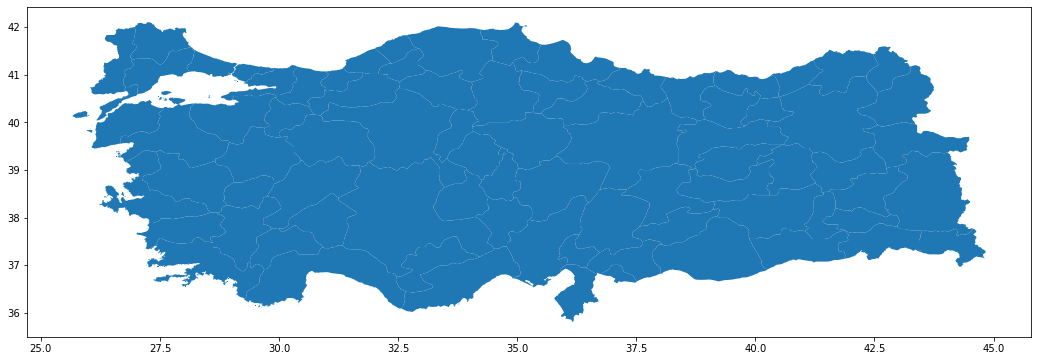

In [194]:
harita_data.plot(figsize=(18,18))

**Sorun yok!**

Şimdi geldik görselleştirme işine...

<AxesSubplot:>

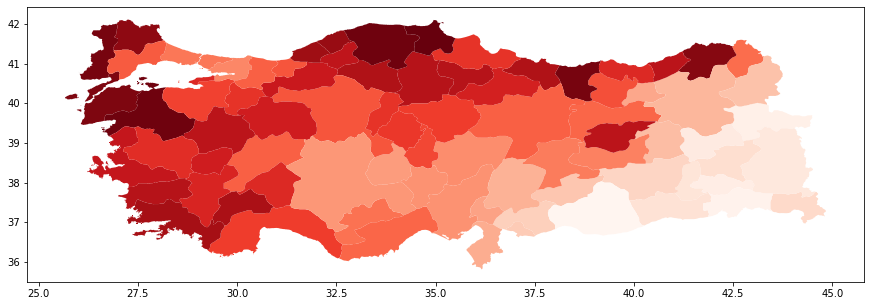

In [195]:
harita_data.plot(column="Yas",cmap="Reds",figsize=(15,18))
#column argümanı renklendirmek istediğimiz kolon
#cmap ise hangi rengi kullanacağımızı belirliyor

İşte haritamız hazır diyemiyorum, çünkü bazı eksikliklerimiz var. İl isimleri ve haritamızın başlığı eksik. Özellikle il ismi ekleme işlemi biraz zahmetli. 

Öncelikle elimizdeki verinin bir kopyasını oluşturuyoruz ve daha sonra **geometry** kolonunda yer alan enlem ve boylamların ortalama değerlerini hesaplıyoruz ki il isimlerini tek bir nokta olarak yerleştirebilelim. 

In [196]:
harita_data_points = harita_data.copy()
harita_data_points["center"] = harita_data_points["geometry"].centroid
harita_data_points.set_geometry("center", inplace = True)

In [197]:
harita_data_points

,ID_0,ISO,NAME_0,ID_1,İl,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Yas,center
0,235,TUR,Turkey,1,Çanakkale,Il,Province,None,None,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39...","40,3",POINT (26.75106 40.05661)
1,235,TUR,Turkey,2,Çankiri,Il,Province,None,Çankırı|Changra,"POLYGON ((33.78607 40.96249, 33.78677 40.95684...","38,5",POINT (33.42615 40.68986)
2,235,TUR,Turkey,3,Çorum,Il,Province,None,None,"POLYGON ((34.81906 41.20172, 34.84486 41.19581...","38,1",POINT (34.66202 40.56634)
3,235,TUR,Turkey,4,Adana,Il,Province,None,Seyhan,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36...","32,1",POINT (35.59445 37.46170)
4,235,TUR,Turkey,5,Adiyaman,Il,Province,None,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160...","27,7",POINT (38.33526 37.80429)
...,...,...,...,...,...,...,...,...,...,...,...,...
75,235,TUR,Turkey,77,Usak,Il,Province,None,Uşak,"POLYGON ((29.89273 38.77788, 29.89274 38.73051...","36,9",POINT (29.36163 38.53510)
76,235,TUR,Turkey,78,Van,Il,Province,None,None,"POLYGON ((43.34184 39.39789, 43.35878 39.38728...",23,POINT (43.63811 38.47572)
77,235,TUR,Turkey,79,Yalova,Il,Province,None,None,"POLYGON ((29.39486 40.70208, 29.39486 40.70181...","36,3",POINT (29.11771 40.58542)
78,235,TUR,Turkey,80,Yozgat,Il,Province,None,None,"POLYGON ((35.34320 40.21666, 35.35103 40.20958...",35,POINT (35.25198 39.66226)


Daha sonra ise **adjustText** paketine ihtiyacımız olacak. 

In [198]:
import adjustText as aT

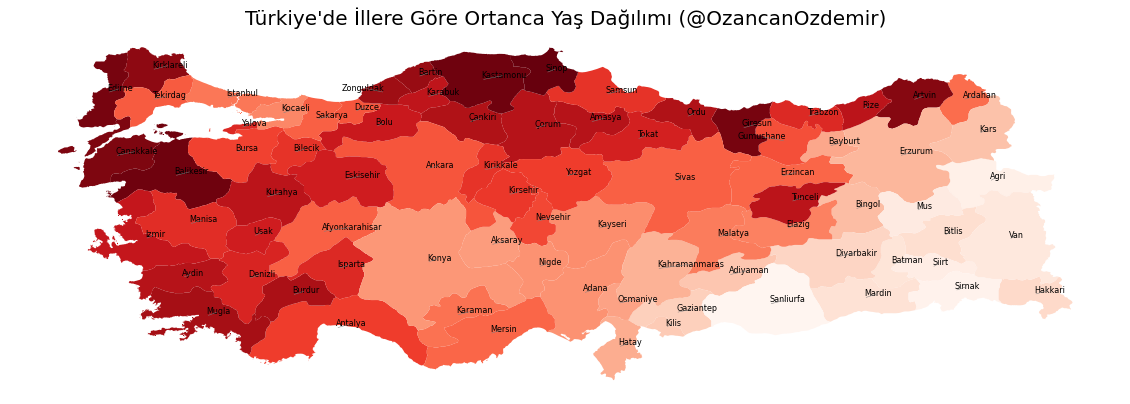

In [199]:
ax = harita_data.plot(figsize = (20, 12), column = "Yas",cmap="Reds")
texts = []

for x, y, label in zip(harita_data_points.center.x, harita_data_points.center.y, harita_data_points["İl"]):
    texts.append(plt.text(x, y, label, fontsize = 8)) #illerin ve karşılık gelen enlem ve boylam ortalamalarını içeren veri seti oluşturuyoruz 

aT.adjust_text(texts, force_points=0.3, force_text=5, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5)) #il isimlerini haritaya ekliyoruz. 

ax.set_title("Türkiye'de İllere Göre Ortanca Yaş Dağılımı (@OzancanOzdemir)",size = 20)
ax.set_axis_off() #eksenleri kaldırıyoruz

**Referanslar**

+ [Creating a population map of Turkey with Geopandas ](https://www.youtube.com/watch?v=4ox02WgiTWk)

+ [labelling districts in GeoPandas](https://github.com/shotleft/how-to-python/blob/master/How%20it%20works%20-%20labelling%20districts%20in%20GeoPandas.ipynb)